In [ ]:
#https://www.youtube.com/watch?v=QIUxPv5PJOY
#LSTM program (Long Short Term Memory)

In [3]:
import math
import pandas_datareader as web
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [4]:
#get the stock quote 
df = web.DataReader('AAPL', data_source= 'yahoo', start= "2016-01-01", end = "2020-12-31")
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.364536
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.753977
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.289116
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.306208
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.424154
...,...,...,...,...,...,...
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.773087
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.486053
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.668762


In [5]:
#get the number of colums and rows in the dataset
df.shape


(1259, 6)

Text(0, 0.5, 'Closing price USD ($)')

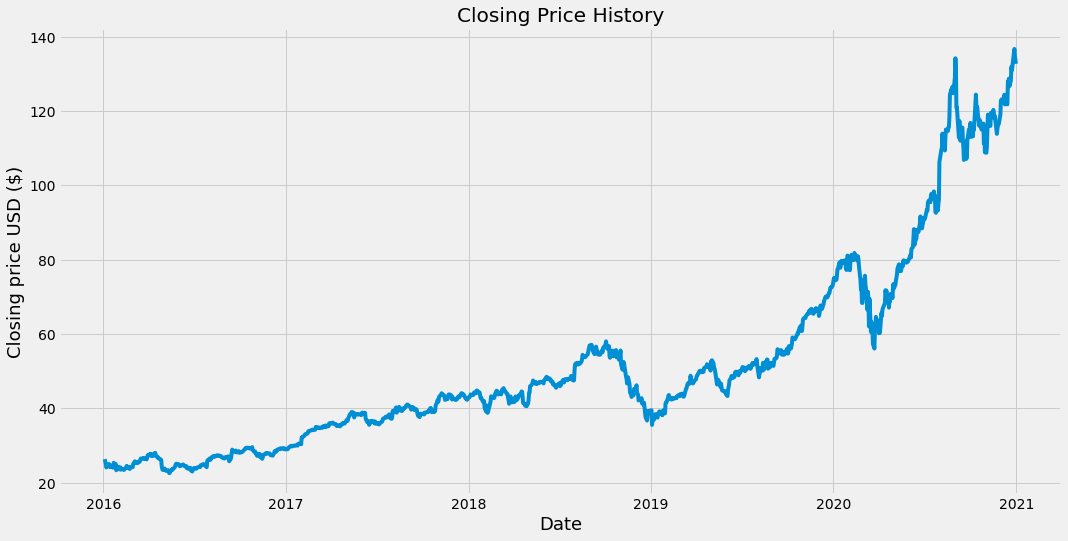

In [6]:
#vizualize the closing price history
plt.figure(figsize=(16, 8))
plt.title("Closing Price History")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Closing price USD ($)", fontsize = 18)